In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import time

<hr>

## EDA

### Users File Description
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [56]:
users = pd.read_csv('./ml-1m/users.dat', sep='::', header=None, engine='python')
users.columns= ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.head()

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

In [57]:
users.describe()

UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000

### Movies File Description
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [58]:
movies = pd.read_csv('./ml-1m/movies.dat', sep='::', header=None, engine='python', encoding = "ISO-8859-1")
movies.columns= ['MovieID', 'Title', 'Genres']
movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

### Ratings File Description
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


In [59]:
ratings = pd.read_csv('./ml-1m/ratings.dat', sep='::', header=None, engine='python')
ratings.columns= ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.drop(columns=['Timestamp'], inplace=True)
ratings.head()

UserID  MovieID  Rating
0       1     1193       5
1       1      661       3
2       1      914       3
3       1     3408       4
4       1     2355       5

In [60]:
ratings.shape

(1000209, 3)

In [61]:
ratings.Rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

### Normalize the ratings by user ratings
- Some users give high ratings to almost all movies, however some give very low ratings. To nullify the effect of user preferences, we can normalize the user ratings by substracting the mean rating for each user.

- To ensure our ratings columns has positive values, we will normalize it to contain rating between 0 and 1

In [62]:
temp_uid = ratings.groupby(by=['UserID']).mean()
temp_uid.head()

MovieID    Rating
UserID                       
1       1560.547170  4.188679
2       1784.015504  3.713178
3       1787.450980  3.901961
4       1932.000000  4.190476
5       1762.747475  3.146465

In [63]:
ratings1 = pd.merge(ratings, temp_uid['Rating'], on='UserID')
ratings1['rating_normalized'] = ratings1.Rating_x - ratings1.Rating_y

In [64]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [65]:
ratings_normalized = NormalizeData(ratings1['rating_normalized'])
ratings1['rating_normalized'] = ratings_normalized
ratings1 = ratings1.rename(columns={'Rating_x': 'original_rating', 'Rating_y': 'mean_rating_by_user'})

In [66]:
ratings1.head()

UserID  MovieID  original_rating  mean_rating_by_user  rating_normalized
0       1     1193                5             4.188679           0.619810
1       1      661                3             4.188679           0.356186
2       1      914                3             4.188679           0.356186
3       1     3408                4             4.188679           0.487998
4       1     2355                5             4.188679           0.619810

In [67]:
ratings1.groupby(by=['MovieID']).mean()

UserID  original_rating  mean_rating_by_user  rating_normalized
MovieID                                                                      
1        3053.819933         4.146846             3.667349           0.576072
2        3027.977175         3.201141             3.525284           0.470143
3        2632.156904         3.016736             3.456983           0.454839
4        3268.841176         2.729412             3.428227           0.420756
5        3143.152027         3.006757             3.426533           0.457537
...              ...              ...                  ...                ...
3948     2063.107889         3.635731             3.608575           0.516448
3949     2289.046053         4.115132             3.566000           0.585251
3950     2123.370370         3.666667             3.614114           0.519796
3951     1687.925000         3.900000             3.543063           0.559917
3952     2002.659794         3.780928             3.615590           0.534662

[3706 rows x 4 columns]

We can observe from above table how rating_normalized takes care of user preference to always give high ratings or low ratings. Specifically, we can observe row number 3 and 5. Avg. rating for movie 3 is actually high, but after normalization, its lower than movie 5.

In [68]:
temp = ratings1.groupby(by = ['UserID']).mean()
temp.head()

MovieID  original_rating  mean_rating_by_user  rating_normalized
UserID                                                                      
1       1560.547170         4.188679             4.188679           0.512869
2       1784.015504         3.713178             3.713178           0.512869
3       1787.450980         3.901961             3.901961           0.512869
4       1932.000000         4.190476             4.190476           0.512869
5       1762.747475         3.146465             3.146465           0.512869

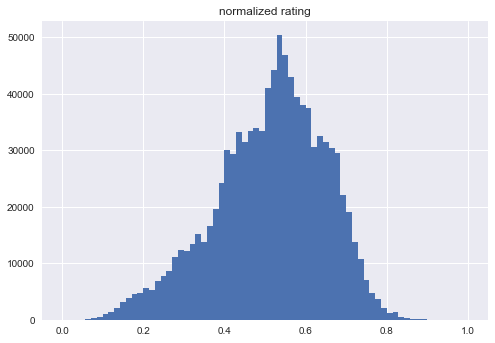

In [69]:
plt.hist(ratings1['rating_normalized'], bins=70)
plt.title('normalized rating')
plt.show()

In [70]:
ratings1['original_rating'].value_counts(normalize=True) * 100

4    34.889808
3    26.114242
5    22.626271
2    10.753453
1     5.616226
Name: original_rating, dtype: float64

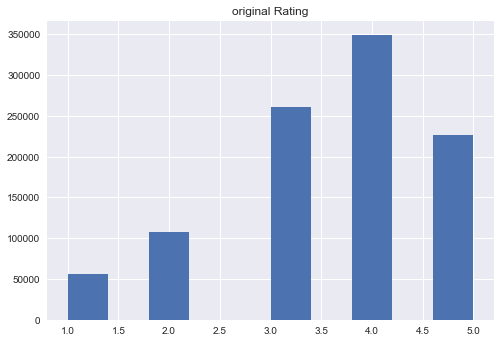

In [71]:
plt.hist(ratings1['original_rating'], bins=10)
plt.title('original Rating')
plt.show()

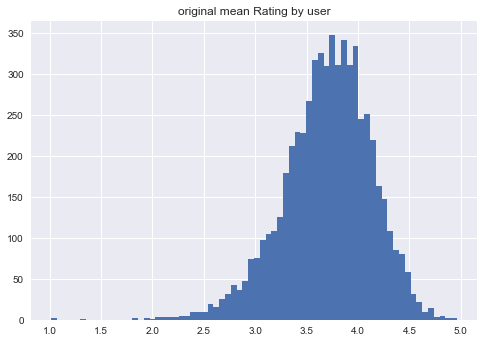

In [72]:
plt.hist(temp['original_rating'], bins=70)
plt.title('original mean Rating by user')
plt.show()

### Ratings per Movie

- Here, we will check what is the distribution of number of ratings for each movie.
- Minimum number of ratings for some movies is only 1. We need to remove such movies while suggesting top movies by genre.

In [73]:
temp = ratings1.groupby(by=['MovieID']).count()
temp.UserID.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: UserID, dtype: float64

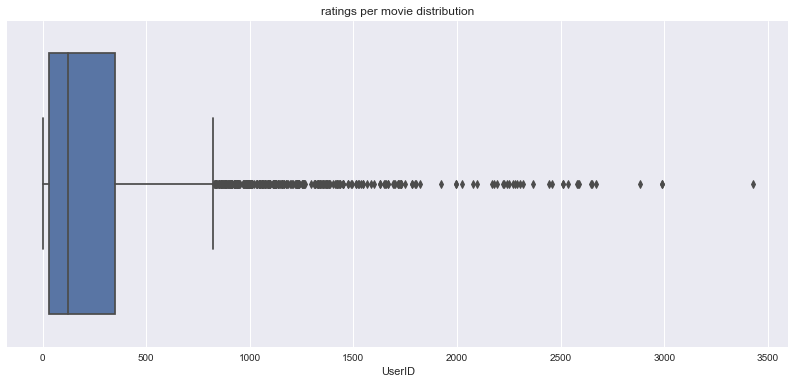

In [74]:
plt.figure(figsize=[14,6])
tips = sns.load_dataset("tips")
plt.title('ratings per movie distribution')
ax = sns.boxplot(x=temp["UserID"])

### Ratings per User

- Here, we will check what is the distribution of number of ratings by each user.
- Minimum number of ratings per user are 20 which is good.

In [75]:
temp = ratings1.groupby(by=['UserID']).count()
temp.MovieID.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: MovieID, dtype: float64

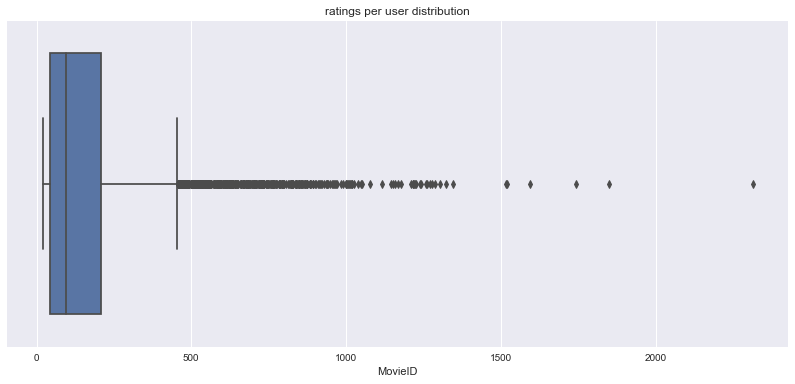

In [76]:
plt.figure(figsize=[14,6])
# sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.title('ratings per user distribution')
ax = sns.boxplot(x=temp["MovieID"])
# plt.axvline(x=33, c='r')

In [77]:
movies.shape

(3883, 3)

In [78]:
len(ratings.MovieID.unique())

3706

There are 177 movies that have not been rated by any user.

### Distribution of Genres

In [79]:
all_genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [16]:
# ratings1.merge(movies, on='MovieID')
genres_dict = {}

for genre in all_genres:
    count = sum(movies.Genres.str.contains(genre))
    genres_dict[genre]=count

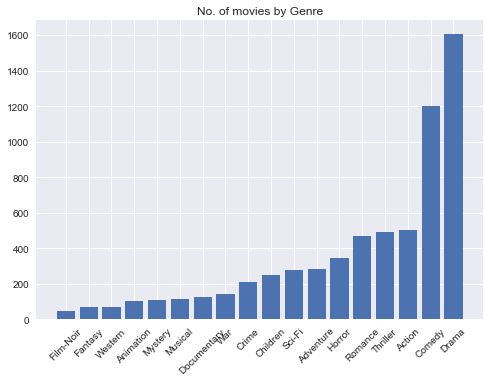

In [17]:
genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1]))

plt.bar(genres_dict.keys(), genres_dict.values())
plt.xticks(rotation=45)
plt.title('No. of movies by Genre')
plt.show()

Most of the movies are Drama and Comedy

In [80]:
master_df = pd.merge(ratings1, movies, on='MovieID')

In [81]:
genres_popularity_dict = {}
for genre in all_genres:
    df = master_df[master_df.Genres.str.contains(genre)]
    mean = df.original_rating.mean()
    genres_popularity_dict[genre]=mean

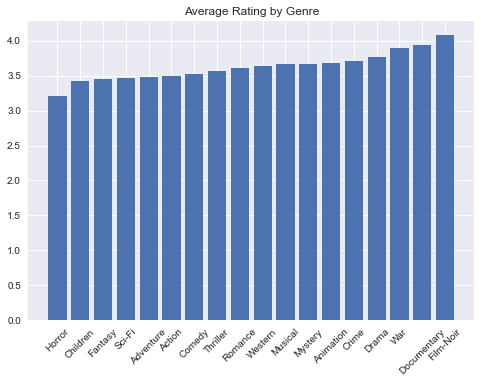

In [20]:
genres_popularity_dict = dict(sorted(genres_popularity_dict.items(), key=lambda item: item[1]))

plt.bar(genres_popularity_dict.keys(), genres_popularity_dict.values())
plt.xticks(rotation=45)
plt.title('Average Rating by Genre')
plt.show()

Film-Noir has highest average rating, but number of such movies are very less compared to other genre. It is followed by Documentary.

<hr>

## Recommending top movies by Genre

In [109]:
# choose Genre
gen = 'Film-Noir'

In [110]:
# count the number of ratings each movies has received
mcount = master_df.groupby(by=['MovieID']).count()[['Genres']]
mcount = mcount.rename(columns={'Genres':'number_of_ratings'})
master_df1 = master_df.merge(mcount, on='MovieID')

In [111]:
# filter by Genre and select movies that have recieve at-least 300 ratings
filt = (master_df1.Genres.str.contains(gen)) & (master_df1['number_of_ratings']>300) 
master_df2 = master_df1[filt]

In [112]:
top_movies_by_Genere = master_df2.groupby(by=['MovieID']).mean().sort_values(by=['rating_normalized'], ascending=False)
top_movies_by_Genere.index

Int64Index([ 922,  913, 3435, 1252,  930, 1260, 1267,  541, 2186, 1284, 3683,
            1248, 1617, 3334, 1344, 1748, 1179, 2987,  164, 3706],
           dtype='int64', name='MovieID')

<hr>

## Building Recommender System using Collaborative Filtering

### Idea 1

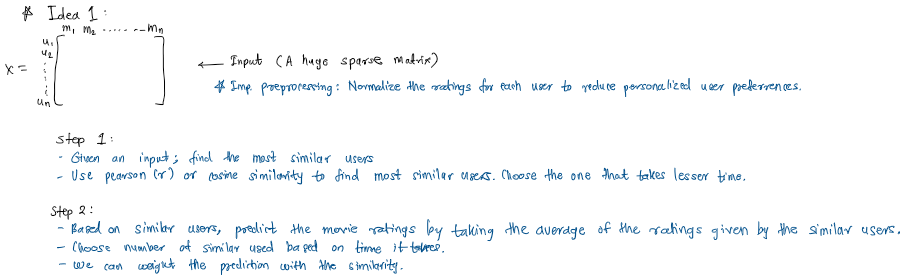

In [21]:
master_df.columns

Index(['UserID', 'MovieID', 'original_rating', 'mean_rating_by_user',
       'rating_normalized', 'Title', 'Genres'],
      dtype='object')

In [22]:
mat = master_df.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T
mat.head()

UserID      1     2     3     4     5         6     7         8         9     \
MovieID                                                                        
1        0.61981   NaN   NaN   NaN   NaN  0.525864   NaN  0.528041  0.679499   
2            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   
3            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   
4            NaN   NaN   NaN   NaN   NaN       NaN   NaN  0.396229       NaN   
5            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   

UserID      10    ...  6031      6032  6033  6034      6035      6036  6037  \
MovieID           ...                                                         
1        0.62956  ...   NaN  0.495125   NaN   NaN  0.695993       NaN   NaN   
2        0.62956  ...   NaN       NaN   NaN   NaN       NaN       NaN   NaN   
3            NaN  ...   NaN       NaN   NaN   NaN  0.300557       NaN   NaN   
4            NaN  ...   NaN       NaN   NaN   NaN  0.432369  0.341127   NaN   
5            NaN  ...   NaN       NaN   NaN   NaN  0.300557       NaN   NaN   

UserID   6038  6039      6040  
MovieID                        
1         NaN   NaN  0.436719  
2         NaN   NaN       NaN  
3         NaN   NaN       NaN  
4         NaN   NaN       NaN  
5         NaN   NaN       NaN  

[5 rows x 6040 columns]

In [539]:
mat.shape

(3706, 6040)

In [540]:
mat.iloc[:, 0]

MovieID
1       0.61981
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
3948        NaN
3949        NaN
3950        NaN
3951        NaN
3952        NaN
Name: 1, Length: 3706, dtype: float64

In [541]:
master_df[(master_df.UserID==1) & (master_df.MovieID==1)]

UserID  MovieID  original_rating  mean_rating_by_user  \
41626       1        1                5             4.188679   

       rating_normalized             Title                       Genres  
41626            0.61981  Toy Story (1995)  Animation|Children's|Comedy

In [542]:
mat.corrwith(mat.iloc[:, 0])

C:\Users\Sandi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Sandi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


UserID
1       1.000000
2       0.416667
3      -0.332182
4       0.333333
5      -0.172516
          ...   
6036   -0.201132
6037   -0.451754
6038         NaN
6039    0.056857
6040   -0.043519
Length: 6040, dtype: float64

In [543]:
# %%timeit
correlation_with_user = mat.corrwith(mat.iloc[:, 2])
corred = pd.DataFrame(correlation_with_user,columns=['Corr'])
corred.dropna(inplace=True)
corred.head()

Corr
UserID          
1      -0.332182
2       0.236834
3       1.000000
4       0.840168
5      -0.437621

In [544]:
sum(corred.sort_values('Corr',ascending=False)['Corr']==1)

102

In [545]:
corred.sort_values('Corr',ascending=False).head()

Corr
UserID      
995      1.0
3407     1.0
5587     1.0
3275     1.0
3215     1.0

In [546]:
corred = corred.sort_values('Corr',ascending=False)

In [547]:
pred_df = pd.DataFrame()
for i in range(100):
    pred_df[corred.index[i]] = mat.loc[:, corred.index[i]]
pred_df['mean'] = pred_df.mean(axis=1)

In [548]:
pred_df.sort_values('mean', ascending=False)

995  3407  5587  3275  3215  3109  992  3040  4783  2871  ...  5929  \
MovieID                                                            ...         
1175     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
3491     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
1780     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
2261     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
2065     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  ...   ...   
3943     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
3944     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
3945     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
3950     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   
3951     NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   NaN   

         2193  1240  2183  5030  1316  1006  1575  5052      mean  
MovieID                                                            
1175      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.798997  
3491      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.798997  
1780      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.798997  
2261      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.798997  
2065      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.798997  
...       ...   ...   ...   ...   ...   ...   ...   ...       ...  
3943      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN  
3944      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN  
3945      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN  
3950      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN  
3951      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN  

[3706 rows x 101 columns]

In [549]:
pred_df['mean']

MovieID
1       0.545037
2       0.455694
3       0.579783
4       0.438724
5       0.371293
          ...   
3948    0.487251
3949    0.571586
3950         NaN
3951         NaN
3952    0.227276
Name: mean, Length: 3706, dtype: float64

In [550]:
mat.iloc[:, 2]

MovieID
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
3948   NaN
3949   NaN
3950   NaN
3951   NaN
3952   NaN
Name: 3, Length: 3706, dtype: float64

In [551]:
# np.sqrt(np.nanmean((np.array(y_true) - np.array(y_pred))**2, ))
np.sqrt(np.nanmean((np.array(mat.iloc[:, 2]) - np.array(pred_df['mean']))**2))

0.10219359786296539

### Checking performance of this algorithm

In [471]:
len(master_df.UserID.unique())

6040

In [482]:
trn_users = np.random.choice(master_df.UserID.unique(), 
                             int(len(master_df.UserID.unique())*0.95), replace=False)
len(trn_users)

5738

In [483]:
trn = master_df.loc[master_df.UserID.isin(trn_users), :]
tst = master_df.loc[~master_df.UserID.isin(trn_users), :]

In [485]:
len(trn), len(tst)

(945764, 54445)

In [508]:
trn_mat = trn.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T
tst_mat = tst.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T

In [513]:
len(tst_mat.columns)

302

In [512]:
tst_mat.iloc[:, :]

UserID   2     7     25    57    93        173       178       195       202   \
MovieID                                                                         
1         NaN   NaN   NaN   NaN   NaN  0.517098       NaN  0.659273  0.611826   
2         NaN   NaN   NaN   NaN   NaN       NaN       NaN  0.395649       NaN   
3         NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN  0.480014   
4         NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   
5         NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN  0.480014   
...       ...   ...   ...   ...   ...       ...       ...       ...       ...   
3948      NaN   NaN   NaN   NaN   NaN  0.517098       NaN  0.527461       NaN   
3949      NaN   NaN   NaN   NaN   NaN  0.517098       NaN  0.659273       NaN   
3950      NaN   NaN   NaN   NaN   NaN  0.385286       NaN  0.527461       NaN   
3951      NaN   NaN   NaN   NaN   NaN  0.648910       NaN  0.659273       NaN   
3952      NaN   NaN   NaN   NaN   NaN  0.253474  0.665312       NaN       NaN   

UserID       204   ...      5841      5847      5857  5885  5894  5904  5909  \
MovieID            ...                                                         
1        0.571386  ...  0.625738  0.511758  0.469371   NaN   NaN   NaN   NaN   
2        0.571386  ...       NaN       NaN  0.601183   NaN   NaN   NaN   NaN   
3             NaN  ...       NaN  0.248134       NaN   NaN   NaN   NaN   NaN   
4             NaN  ...       NaN       NaN       NaN   NaN   NaN   NaN   NaN   
5             NaN  ...       NaN  0.379946       NaN   NaN   NaN   NaN   NaN   
...           ...  ...       ...       ...       ...   ...   ...   ...   ...   
3948     0.703198  ...  0.493926       NaN       NaN   NaN   NaN   NaN   NaN   
3949          NaN  ...       NaN       NaN       NaN   NaN   NaN   NaN   NaN   
3950          NaN  ...       NaN       NaN       NaN   NaN   NaN   NaN   NaN   
3951          NaN  ...       NaN       NaN       NaN   NaN   NaN   NaN   NaN   
3952          NaN  ...       NaN       NaN       NaN   NaN   NaN   NaN   NaN   

UserID       5971      5989      6025  
MovieID                                
1        0.571092  0.648104  0.736609  
2             NaN  0.516292       NaN  
3             NaN       NaN  0.472985  
4             NaN       NaN  0.472985  
5             NaN       NaN       NaN  
...           ...       ...       ...  
3948          NaN       NaN       NaN  
3949          NaN       NaN       NaN  
3950          NaN       NaN       NaN  
3951          NaN       NaN       NaN  
3952          NaN       NaN       NaN  

[3080 rows x 302 columns]

In [602]:
test_rmse_dict = {}
test_rmse_dict[0] = []
for t in range(0, len(tst_mat.columns)):
    # calculate correlation with each user in training set for user in test set
    correlation_with_user = trn_mat.corrwith(tst_mat.iloc[:, t])
    corred = pd.DataFrame(correlation_with_user,columns=['Corr'])
    corred.dropna(inplace=True)
    corred = corred.sort_values('Corr',ascending=False)
    pred_df = pd.DataFrame()

    # take nearest users and average their rating row-wise to come up with final prediction
    for i in range(10):
        pred_df[corred.index[i]] = trn_mat.loc[:, corred.index[i]]
    pred_df['mean_rating_pred'] = pred_df.mean(axis=1)

    # select only those movies that are there in our test set
    pred_df = pred_df.iloc[pred_df.index.isin(tst_mat.index),]

    # drop movies in our test set which were not available in train set
    idx = tst_mat.index[~tst_mat.index.isin(pred_df.index)]
    tst_mat.drop(idx, axis=0, inplace=True)

    rmse = np.sqrt(np.nanmean((np.array(tst_mat.iloc[:, t]) - np.array(pred_df['mean_rating_pred']))**2))
    test_rmse_dict[0].append(rmse)

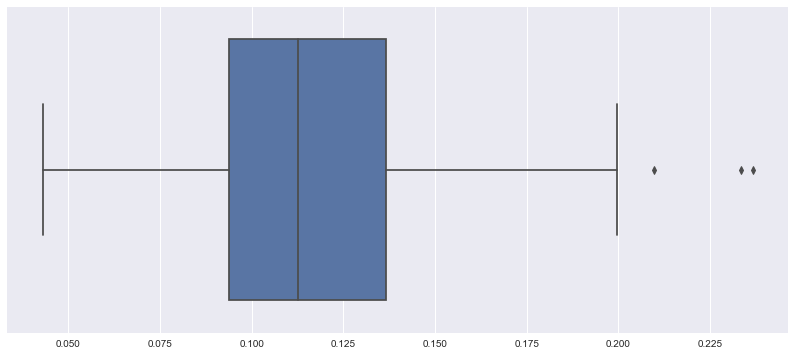

In [614]:
t_start = time.time()
plt.figure(figsize=[14,6])
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=test_rmse_dict[0])
t_end = time.time()

In [615]:
t_end - t_start

0.020943880081176758

In [23]:
test_rmse_dict = {}
t_start = time.time()

for test_set in range(10):
    # randomly select train-test users
    trn_users = np.random.choice(master_df.UserID.unique(), 
                             int(len(master_df.UserID.unique())*0.95), replace=False)
    
    trn = master_df.loc[master_df.UserID.isin(trn_users), :]
    tst = master_df.loc[~master_df.UserID.isin(trn_users), :]
    
    trn_mat = trn.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T
    tst_mat = tst.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T
    
    test_rmse_dict[test_set] = []
    
    for t in range(0, len(tst_mat.columns)):
        # calculate correlation with each user in training set for user in test set
        correlation_with_user = trn_mat.corrwith(tst_mat.iloc[:, t])
        corred = pd.DataFrame(correlation_with_user,columns=['Corr'])
        corred.dropna(inplace=True)
        corred = corred.sort_values('Corr',ascending=False)
        pred_df = pd.DataFrame()

        # take nearest users and average their rating row-wise to come up with final prediction
        for i in range(10):
            pred_df[corred.index[i]] = trn_mat.loc[:, corred.index[i]]
        pred_df['mean_rating_pred'] = pred_df.mean(axis=1)

        # select only those movies that are there in our test set
        pred_df = pred_df.iloc[pred_df.index.isin(tst_mat.index),]

        # drop movies in our test set which were not available in train set
        idx = tst_mat.index[~tst_mat.index.isin(pred_df.index)]
        tst_mat.drop(idx, axis=0, inplace=True)

        rmse = np.sqrt(np.nanmean((np.array(tst_mat.iloc[:, t]) - np.array(pred_df['mean_rating_pred']))**2))
        test_rmse_dict[test_set].append(rmse)
    
    print(test_set)
t_end = time.time()

0
1
2
3
4
5
6
7
8
9


In [24]:
t_end - t_start

5977.76284122467

In [26]:
test_result = pd.DataFrame.from_dict(test_rmse_dict)
test_result.to_csv('tst_result.csv')

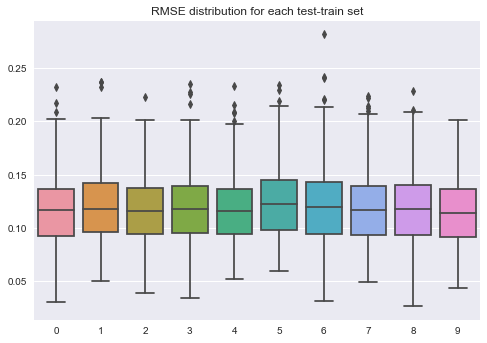

In [28]:
plt.title('RMSE distribution for each test-train set')
ax = sns.boxplot(data=test_result)

### Predicting movie recommendations for new user

In [122]:
# create training matrix
trn_mat = master_df.pivot_table(index='UserID',columns='MovieID',values='rating_normalized').T

# find correlation with users ratings
correlation_with_user = trn_mat.corrwith(tst_mat.iloc[:, t])
corred = pd.DataFrame(correlation_with_user,columns=['Corr'])
corred.dropna(inplace=True)
corred = corred.sort_values('Corr',ascending=False)
pred_df = pd.DataFrame()

In [123]:
# take nearest users and average their rating row-wise to come up with final prediction
for i in range(100):
    pred_df[corred.index[i]] = trn_mat.loc[:, corred.index[i]]
pred_df['mean_rating_pred'] = pred_df.mean(axis=1)

In [125]:
# sort by popularity to predict movies to the new user
pred_df = pred_df.sort_values(by=['mean_rating_pred'], ascending=False)
pred_df

1533  2905  2970  3617  1871  2968  2035  5566  4835  2936  ...  \
MovieID                                                              ...   
2208      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
931       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
506       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1546      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3942      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3944      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3946      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3947      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3950      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2767  5211  5219  3794  5230  649  508       655      2682  \
MovieID                                                               
2208      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN  0.816036   
931       NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN  0.816036   
942       NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN  0.816036   
506       NaN   NaN   NaN   NaN   NaN  NaN  NaN  0.811685       NaN   
1546      NaN   NaN   NaN   NaN   NaN  NaN  NaN  0.811685       NaN   
...       ...   ...   ...   ...   ...  ...  ...       ...       ...   
3942      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   
3944      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   
3946      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   
3947      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   
3950      NaN   NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   

         mean_rating_pred  
MovieID                    
2208             0.816036  
931              0.816036  
942              0.816036  
506              0.811685  
1546             0.811685  
...                   ...  
3942                  NaN  
3944                  NaN  
3946                  NaN  
3947                  NaN  
3950                  NaN  

[3706 rows x 101 columns]

<hr>

## Idea 2: SVD

<hr>

## Idea 3: Non-Negative Matrix Factorization